<a href="https://colab.research.google.com/github/Kshamika-Ghiya/WineQualityTesting_PY-ML/blob/main/WineTesting_White.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import imblearn
import collections
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import TomekLinks, ClusterCentroids
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
wine = pd.read_csv('/content/winequality-white.csv', delimiter = ";")

In [ ]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

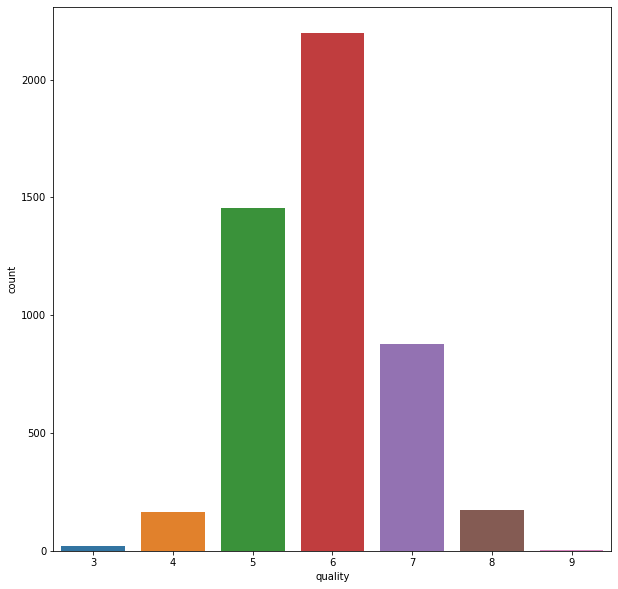

In [ ]:
plt.figure(figsize = (10, 10))
sns.countplot(wine["quality"])
wine["quality"].value_counts()

In [ ]:
quality = wine["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")

In [ ]:
[(i, category.count(i)) for i in set(category)]

[('High', 1060), ('Low', 183), ('Medium', 3655)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


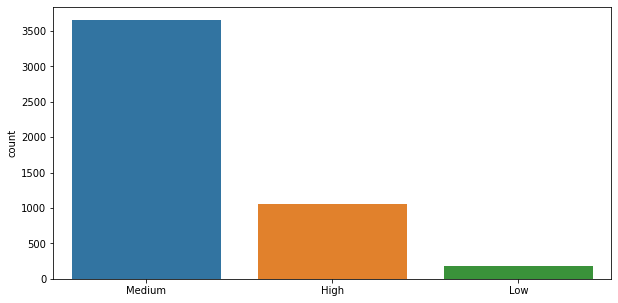

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(category)

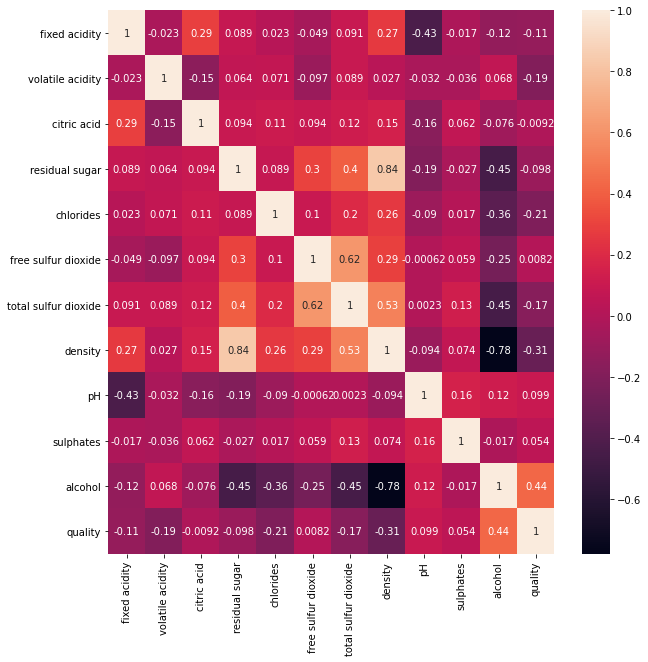

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(wine.corr(), annot = True)

In [ ]:
quality = wine["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")
category = pd.DataFrame(data = category, columns = ["category"])
data = pd.concat([wine, category], axis = 1)
data.drop(columns = "quality", axis = 1, inplace = True)
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
clf = RandomForestClassifier(random_state=42, oob_score=True)
param_dist = {"n_estimators": [50, 100, 150, 200, 250], 'min_samples_leaf': [1, 2, 4]}
rfc_gs = GridSearchCV(clf, param_grid=param_dist, scoring='accuracy', cv=5)
rfc_gs.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=42,
                                   

In [ ]:
rfc_gs.best_score_

0.8325634659994267

In [ ]:
skf = StratifiedKFold(n_splits = 4)

In [ ]:
pipe_svm = Pipeline([('clf', svm.SVC())])
grid_params = dict(clf__C=[0.1, 0.3, 1, 3, 10], clf__gamma=[0.1, 0.3, 1, 3, 10], clf__kernel=['rbf', 'sigmoid'])
gs_svm = GridSearchCV(estimator=pipe_svm, param_grid=grid_params, scoring='accuracy', cv=skf)
gs_svm.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'clf__C': [0.1, 0.3, 1, 3, 10],
                 

In [ ]:
print(gs_svm.best_score_)

0.8098504825832274


In [ ]:
pred_svm = gs_svm.predict(x_test)
print(classification_report(y_test, pred_svm))
print("The SVM model accuracy on Test data is %s" % accuracy_score(y_test, pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.39      0.56       227
           1       1.00      0.07      0.12        30
           2       0.81      1.00      0.90       723

    accuracy                           0.83       980
   macro avg       0.94      0.48      0.53       980
weighted avg       0.86      0.83      0.79       980

The SVM model accuracy on Test data is 0.8295918367346938


In [ ]:
y_test_re = list(y_test)
for i in range(len(y_test_re)):
    if y_test_re[i] == 0:
        y_test_re[i] = "high"
    if y_test_re[i] == 1:
        y_test_re[i] = "low"
    if y_test_re[i] == 2:
        y_test_re[i] = "medium"
pred_svm_re = list(pred_svm)
for i in range(len(pred_svm_re)):
    if pred_svm_re[i] == 0:
        pred_svm_re[i] = "high"
    if pred_svm_re[i] == 1:
        pred_svm_re[i] = "low"
    if pred_svm_re[i] == 2:
        pred_svm_re[i] = "medium"
y_actu = pd.Series(y_test_re, name='Actual')
y_pred = pd.Series(pred_svm_re, name='Predicted')
svm_confusion = pd.crosstab(y_actu, y_pred)

In [ ]:
svm_confusion

Predicted,high,low,medium
Actual,,,
high,88,0,139
low,0,2,28
medium,0,0,723


In [ ]:
clf = Pipeline([
    ('scl', StandardScaler()),
    ('pca', PCA(random_state=42)),
    ('clf', DecisionTreeClassifier(random_state=42))])

criterion = ['gini', 'entropy']
splitter = ['best']
max_depth = [8, 9, 10, 11, 15, 20, 25]
min_samples_leaf = [2, 3, 5]
class_weight = ['balanced', None]

param_grid =\
    [{'clf__class_weight': class_weight,
      'clf__criterion': criterion,
      'clf__splitter': splitter,
      'clf__max_depth': max_depth,
      'clf__min_samples_leaf': min_samples_leaf
      }]

gs_dt = GridSearchCV(estimator=clf, param_grid=param_grid,
                     scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
gs_dt.fit(x_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   20.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                      

In [ ]:
print(gs_dt.best_score_)

0.7651927437641725


In [ ]:
pipe_knn_pca = Pipeline([('pca', PCA()),
                         ('clf', KNeighborsClassifier())])
grid_params_knn_pca = \
    dict(pca__n_components=range(1, 11), clf__n_neighbors=range(1, 10))

gs_knn_pca = GridSearchCV(estimator=pipe_knn_pca,
                          param_grid=grid_params_knn_pca,
                          scoring='accuracy')

gs_knn_pca.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
               

In [ ]:
print(gs_knn_pca.best_score_)

0.7508878072301718


In [ ]:
pred_rfc = rfc_gs.predict(x_test)
print(classification_report(y_test, pred_rfc))
print("The RF model accuracy on Test data is %s" % accuracy_score(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.67      0.74       227
           1       0.67      0.13      0.22        30
           2       0.87      0.96      0.91       723

    accuracy                           0.86       980
   macro avg       0.79      0.59      0.63       980
weighted avg       0.86      0.86      0.85       980

The RF model accuracy on Test data is 0.8642857142857143


In [ ]:
y_test_re = list(y_test)
for i in range(len(y_test_re)):
    if y_test_re[i] == 0:
        y_test_re[i] = "high"
    if y_test_re[i] == 1:
        y_test_re[i] = "low"
    if y_test_re[i] == 2:
        y_test_re[i] = "medium"
pred_rfc_re = list(pred_rfc)
for i in range(len(pred_rfc_re)):
    if pred_rfc_re[i] == 0:
        pred_rfc_re[i] = "high"
    if pred_rfc_re[i] == 1:
        pred_rfc_re[i] = "low"
    if pred_rfc_re[i] == 2:
        pred_rfc_re[i] = "medium"
y_actu = pd.Series(y_test_re, name='Actual')
y_pred = pd.Series(pred_rfc_re, name='Predicted')
rfc_confusion = pd.crosstab(y_actu, y_pred)

In [ ]:
rfc_confusion

Predicted,high,low,medium
Actual,,,
high,151,0,76
low,0,4,26
medium,29,2,692


In [ ]:
smt = ClusterCentroids(ratio={2: 1500})
x_sm, y_sm = smt.fit_sample(x_train, y_train)
smt2 = SMOTE(ratio={0: 1500, 1: 1500})
x_sm2, y_sm2 = smt2.fit_sample(x_sm, y_sm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
rfc_rs = RandomForestClassifier(random_state=42)
param_dist = {"n_estimators": [50, 100, 150, 200, 250],
              'min_samples_leaf': [1, 2, 4]}
rfc_gs_rs = GridSearchCV(rfc_rs, param_grid=param_dist,
                         scoring='accuracy', cv=5)
rfc_gs_rs.fit(x_sm2, y_sm2)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
rfc_gs_rs.best_score_

0.8435555555555554

In [ ]:
importances = rfc_gs_rs.best_estimator_.feature_importances_

In [ ]:
wine.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
feature_importances = pd.DataFrame(importances,index = wine.columns[:-1],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

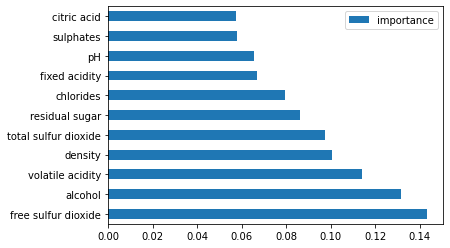

In [ ]:
feature_importances.plot(kind='barh')

In [ ]:
pipe_svm = Pipeline([('clf', svm.SVC())])
grid_params = dict(clf__C=[0.1, 0.3, 1, 3, 10],
                   clf__gamma=[0.1, 0.3, 1, 3, 10],
                   clf__kernel=['rbf', 'sigmoid'])
gs_svm_sm = GridSearchCV(estimator=pipe_svm,
                         param_grid=grid_params,
                         scoring='accuracy',
                         cv=skf)
gs_svm_sm.fit(x_sm2, y_sm2)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'clf__C': [0.1, 0.3, 1, 3, 10],
                 

In [ ]:
gs_svm_sm.best_score_

0.8308888888888889

In [ ]:
clf = Pipeline([
    ('scl', StandardScaler()),
    ('pca', PCA(random_state=42)),
    ('clf', DecisionTreeClassifier(random_state=42))])

criterion = ['gini', 'entropy']
splitter = ['best']
max_depth = [8, 9, 10, 11, 15, 20, 25]
min_samples_leaf = [2, 3, 5]
class_weight = ['balanced', None]

param_grid =\
    [{'clf__class_weight': class_weight,
      'clf__criterion': criterion,
      'clf__splitter': splitter,
      'clf__max_depth': max_depth,
      'clf__min_samples_leaf': min_samples_leaf
      }]

gs_dt_rs = GridSearchCV(estimator=clf,
                        param_grid=param_grid,
                        scoring='accuracy',
                        cv=5,
                        verbose=1,
                        n_jobs=-1)
gs_dt_rs.fit(x_sm2, y_sm2)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   22.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                      

In [ ]:
gs_dt_rs.best_score_

0.7415555555555555

In [ ]:
pipe_knn_pca = Pipeline([('pca', PCA()),
                         ('clf', KNeighborsClassifier())])
grid_params_knn_pca = dict(pca__n_components=range(1, 11),
                           clf__n_neighbors=range(1, 10))

gs_knn_pca_rs = GridSearchCV(estimator=pipe_knn_pca,
                             param_grid=grid_params_knn_pca,
                             scoring='accuracy')

gs_knn_pca_rs.fit(x_sm2, y_sm2)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
               

In [ ]:
gs_knn_pca_rs.best_score_

0.7713333333333333

In [ ]:
svm_rs_predicted = gs_svm_sm.predict(x_test)
print(classification_report(y_test, svm_rs_predicted))
print("---------------------------------------------------------")
print("The accuracy score of SVM (resampled) on test is %s" %
      accuracy_score(y_test, svm_rs_predicted))

              precision    recall  f1-score   support

           0       0.70      0.54      0.61       227
           1       0.20      0.13      0.16        30
           2       0.84      0.91      0.87       723

    accuracy                           0.80       980
   macro avg       0.58      0.53      0.55       980
weighted avg       0.79      0.80      0.79       980

---------------------------------------------------------
The accuracy score of SVM (resampled) on test is 0.7989795918367347


In [ ]:
y_test_re = list(y_test)
for i in range(len(y_test_re)):
    if y_test_re[i] == 0:
        y_test_re[i] = "high"
    if y_test_re[i] == 1:
        y_test_re[i] = "low"
    if y_test_re[i] == 2:
        y_test_re[i] = "medium"
sm_pred_re = list(svm_rs_predicted)
for i in range(len(svm_rs_predicted)):
    if sm_pred_re[i] == 0:
        sm_pred_re[i] = "high"
    if sm_pred_re[i] == 1:
        sm_pred_re[i] = "low"
    if sm_pred_re[i] == 2:
        sm_pred_re[i] = "medium"
svm_rs_confusion = pd.crosstab(
    pd.Series(y_test_re, name='actual'), pd.Series(sm_pred_re, name='predicted'))

In [ ]:
svm_rs_confusion

predicted,high,low,medium
actual,,,
high,123,2,102
low,0,4,26
medium,53,14,656


In [ ]:
pred_rfc_rs = rfc_gs_rs.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_rfc_rs))
print("The RF model(resampled) accuracy on test is %s" %
      accuracy_score(y_test, pred_rfc_rs))

              precision    recall  f1-score   support

           0       0.56      0.84      0.67       227
           1       0.26      0.53      0.35        30
           2       0.91      0.73      0.81       723

    accuracy                           0.75       980
   macro avg       0.58      0.70      0.61       980
weighted avg       0.81      0.75      0.76       980

The RF model(resampled) accuracy on test is 0.7479591836734694


In [ ]:
y_test_re = list(y_test)
for i in range(len(y_test_re)):
    if y_test_re[i] == 0:
        y_test_re[i] = "high"
    if y_test_re[i] == 1:
        y_test_re[i] = "low"
    if y_test_re[i] == 2:
        y_test_re[i] = "medium"
pred_rfc_re = list(pred_rfc_rs)
for i in range(len(pred_rfc_re)):
    if pred_rfc_re[i] == 0:
        pred_rfc_re[i] = "high"
    if pred_rfc_re[i] == 1:
        pred_rfc_re[i] = "low"
    if pred_rfc_re[i] == 2:
        pred_rfc_re[i] = "medium"
y_actu = pd.Series(y_test_re, name='Actual')
y_pred = pd.Series(pred_rfc_re, name='Predicted')
rfc_rs_confusion = pd.crosstab(y_actu, y_pred)

In [ ]:
rfc_rs_confusion

Predicted,high,low,medium
Actual,,,
high,191,1,35
low,0,16,14
medium,152,45,526
